In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
crdc_1516 = pd.read_csv('../filtered_data/00_crdc_1516_initial.csv', 
                        dtype = {'LEAID':np.object})

In [3]:
len(crdc_1516.index)

96360

# <font color = green> Clean Missing Values / Add Enrollment columns </font>
Specificially those for int-columns -- these are recorded as negative numbers that interfere with the enrollment calculations.

In [5]:
crdc_1516_cleaned = crdc_1516.copy()

In [6]:
def missing_value_mapper(value):
    if isinstance(value, int):
        if value < 0:
            return 0
    return value

crdc_1516_cleaned = crdc_1516_cleaned.applymap(missing_value_mapper)

** Total enrollments **

In [7]:
crdc_1516_cleaned['total_enrollment'] = crdc_1516_cleaned['TOT_ENR_M'] + crdc_1516_cleaned['TOT_ENR_F']

** Total white enrollments **

In [8]:
crdc_1516_cleaned['total_white_enrollment'] = crdc_1516_cleaned['SCH_ENR_WH_M'] + crdc_1516_cleaned['SCH_ENR_WH_F']

** Total non-white enrollments **

In [9]:
crdc_1516_cleaned['total_nonwhite_enrollment'] = crdc_1516_cleaned['total_enrollment'] - crdc_1516_cleaned['total_white_enrollment']

** Total LEP enrollment **

In [10]:
crdc_1516_cleaned['total_lep_enrollment'] = crdc_1516_cleaned['SCH_ENR_LEP_M'] + crdc_1516_cleaned['SCH_ENR_LEP_F']

** Total IDEA enrollment **

In [11]:
crdc_1516_cleaned['total_idea_enrollment'] = crdc_1516_cleaned['SCH_ENR_IDEA_M'] + crdc_1516_cleaned['SCH_ENR_IDEA_F']

** Total DE Enrollment **

In [12]:
crdc_1516_cleaned['de_total_enrollment'] = crdc_1516_cleaned['TOT_DUALENR_M'] + crdc_1516_cleaned['TOT_DUALENR_F']

** Total DE white enrollment **

In [13]:
crdc_1516_cleaned['de_white_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_WH_F'] +  crdc_1516_cleaned['SCH_DUALENR_WH_M']

** Total DE non-white enrollment **

In [14]:
crdc_1516_cleaned['de_nonwhite_enrollment'] = crdc_1516_cleaned['de_total_enrollment'] - crdc_1516_cleaned['de_white_enrollment']

** DE Racial Breakdowns **

In [66]:
crdc_1516_cleaned['de_hi_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HI_M'] + crdc_1516_cleaned['SCH_DUALENR_HI_F']
crdc_1516_cleaned['de_am_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AM_M'] + crdc_1516_cleaned['SCH_DUALENR_AM_F']
crdc_1516_cleaned['de_as_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AS_M'] + crdc_1516_cleaned['SCH_DUALENR_AS_F']
crdc_1516_cleaned['de_bl_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_BL_M'] + crdc_1516_cleaned['SCH_DUALENR_BL_F']
crdc_1516_cleaned['de_hp_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HP_M'] + crdc_1516_cleaned['SCH_DUALENR_HP_F']
crdc_1516_cleaned['de_tr_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_TR_M'] + crdc_1516_cleaned['SCH_DUALENR_TR_F']

** Total DE LEA-enrollment **

In [16]:
crdc_1516_cleaned['de_lep_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_LEP_M'] + crdc_1516_cleaned['SCH_DUALENR_LEP_F']

** Total DE IDEA-enrollment **

In [17]:
crdc_1516_cleaned['de_idea_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_IDEA_M'] + crdc_1516_cleaned['SCH_DUALENR_IDEA_F']

** Total AP enrollment **

In [22]:
crdc_1516_cleaned['ap_total_enrollment'] = crdc_1516_cleaned['TOT_APENR_M'] + crdc_1516_cleaned['TOT_APENR_F']

# <font color = green> Manipulate DataFrame </font>

** Add Size Column **

In [43]:
def school_sizer(enroll):
    if enroll < 100:
        return 1
    elif 100 <= enroll < 500:
        return 2
    elif 500 <= enroll < 1200:
        return 3
    return 4

In [44]:
crdc_1516_cleaned['size_group'] = crdc_1516_cleaned['total_enrollment'].apply(lambda x: school_sizer(x))

** Add Region Column **

In [45]:
"""
1:  Middle States Commission on Higher Education - New York, New Jersey, Pennsylvania, Delaware, Maryland, the District of Columbia

2:  New England Association of Schools and Colleges - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

3:  Higher Learning Commission - Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan, Minnesota, Missouri, 
    North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, West Virginia, and Wyoming

4:  Northwest Commission on Colleges and Universities - Alaska, Idaho, Montana, Nevada, Oregon, Utah, and Washington

5:  Southern Association of Colleges and Schools - Alabama, Florida, Georgia, Kentucky, Louisiana, Mississippi, 
    North Carolina, South Carolina, Tennessee, Texas and Virginia

6:  Western Association of Schools and Colleges - California, Hawaii
"""

middle_states = "NY,NJ,PA,DE,MD,DC".split(',')
new_england = "CT,ME,MA,NH,RI,VT".split(',')
higher_learning_commission = "AR,AZ,CO,IA,IL,IN,KS,MI,MN,MO,ND,NE,NM,OH,OK,SD,WI,WV,WY".split(',')
northwest_commission = "AK,ID,MT,NV,OR,UT,WA".split(',')
southern_association = "AL,FL,GA,KY,LA,MS,NC,SC,TN,TX,VA".split(',')
western_association = "CA,HI".split(',')

In [47]:
def region_mapper(state):
    if state in middle_states:
        return "MSCHE"
    elif state in new_england:
        return "NEASC"
    elif state in higher_learning_commission:
        return "HLC"
    elif state in northwest_commission:
        return "NWCCU"
    elif state in southern_association:
        return "SACS"
    elif state in western_association:
        return "WASC"
    else:
        return "Messed Up"
    
crdc_1516_cleaned['region_accred'] = crdc_1516_cleaned['LEA_STATE'].apply(lambda x: region_mapper(x))

** Add Ethnicity Percentage **

In [49]:
crdc_1516_cleaned['pct_eth'] = crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']

Text(0.5,0,'Ethnicity Percentage')

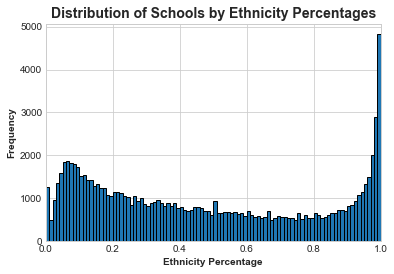

In [50]:
crdc_1516_cleaned.pct_eth.plot.hist(bins=100, xlim = [0,1], edgecolor = 'k')
plt.title('Distribution of Schools by Ethnicity Percentages')
plt.xlabel('Ethnicity Percentage')
# plt.savefig(fname = './Visualizations/By_ethnicity_dist_200.png', dpi = 200)

** Add Ethnicity Percentage Quintile **

In [51]:
def eth_grouper(pct):
    if pct <= .20:
        return 1
    elif .20 < pct <= .4:
        return 2
    elif .4 < pct <= 0.6:
        return 3
    elif .6 < pct <= .8:
        return 4
    return 5
    
crdc_1516_cleaned['eth_quintile'] = crdc_1516_cleaned['pct_eth'].apply(lambda pct: eth_grouper(pct))

# <font color = green> Filter non-Yes Schools </font>

In [57]:
crdc_1516_deYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_DUAL_IND == 'Yes']

In [62]:
display(crdc_1516_deYes['de_total_enrollment'].sum())
crdc_1516_cleaned['de_total_enrollment'].sum()

1180054

1180054

** AP **

In [63]:
crdc_1516_apYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_APENR_IND == 'Yes']

In [64]:
display(crdc_1516_apYes['ap_total_enrollment'].sum())
crdc_1516_cleaned['ap_total_enrollment'].sum()

2808786

2808786

# <font color = green> Analysis </font>

** Total Enrollment in all schools **

In [28]:
crdc_1516_cleaned['total_enrollment'].sum()

50574476

** DE, AP Enrollment in all Schools **

In [59]:
print('DE: ', crdc_1516_deYes['de_total_enrollment'].sum())
print('AP: ', crdc_1516_cleaned['ap_total_enrollment'].sum())

DE:  1180054
AP:  2808786


## By Gender

** Total **

In [69]:
print('Male:', crdc_1516_cleaned['TOT_ENR_M'].sum())
print('Female: ', crdc_1516_cleaned['TOT_ENR_F'].sum())

Male: 25995405
Female:  24579071


** DE **

In [60]:
print('Male:', crdc_1516_deYes['TOT_DUALENR_M'].sum())
print('Female: ', crdc_1516_deYes['TOT_DUALENR_F'].sum())

Male: 536812
Female:  643242


** AP **

In [68]:
print('Male:', crdc_1516_apYes['TOT_APENR_M'].sum())
print('Female: ', crdc_1516_apYes['TOT_APENR_F'].sum())

Male: 1229700
Female:  1579086


## By Race

** DE **

** AP **

## By State

** DE **

In [40]:
crdc_1516_cleaned.groupby('LEA_STATE')['de_total_enrollment'].sum().sort_values(ascending = False).reset_index()

,LEA_STATE,de_total_enrollment
0,TX,133439
1,NY,80188
2,IN,70807
3,WA,56171
4,FL,55254
5,IL,50567
6,OH,50420
7,WI,45968
8,MO,38623
9,NJ,35409


** AP **

In [41]:
crdc_1516_cleaned.groupby('LEA_STATE')['ap_total_enrollment'].sum().sort_values(ascending = False).reset_index()

,LEA_STATE,ap_total_enrollment
0,CA,425288
1,TX,349188
2,FL,195563
3,NY,151912
4,IL,125295
5,GA,115363
6,VA,88948
7,PA,84786
8,NJ,76843
9,MI,75995


# By Size

# By Region

# By Ethnicity Percentage of School

# <font color = green> Participation Gaps </font>

# Participation Rankings

** Percentage of Total Enrollment in DE **

** Percentage of Total Enrollment in AP **